In [749]:
import numpy as np
import pandas as pd
import csv
import os
import string
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim import corpora, models, matutils
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter

In [305]:
import nltk
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ira.mi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [99]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 7.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [100]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [261]:
df = pd.read_csv('UkraineFEB27.csv')

In [250]:
df_en=df[df['language']=='en']

In [262]:
df_1=df_en.loc[:,['text']]

In [626]:
tw_df = df_en.loc[:,['text']]  

In [627]:
tw_df.head(20)

,text
0,#UkraineRussiaWar Captured Russian soldiers\n\...
1,Like everybody else I am rooting for Ukraine t...
3,We elected a game show host and got a clown. #...
4,Ukrainian soldiers wearing sunflowers in their...
5,russian troops destroyed a commercial oil base...
8,Some scenes from #Kyiv this morning: The build...
9,Meanwhile American “intelligence” pretended an...
10,To remind the world: Gaza has lived through 4 ...
11,Please pass it on if you can spot the differen...
12,In their coverage @FoxNews actually sound disa...


In [628]:
print(tw_df.text[19])

#UkraineWar #UkraineRussia #StopRussia Anonymous prevent Russian occupiers from communicating https://t.co/UHo9Gfkz4d


In [629]:
def clean_t(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub('#\w+', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('amp', ' ', text)
    text = re.sub('@\w+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    #text = re.sub('  ', ' ', text)
    #text= text.drop_duplicate()
    #text = text.str.lower()
    return text
    

In [630]:
tw_df = pd.DataFrame(tw_df.text.apply(lambda x: clean_t(x)))

In [631]:
#tw_df['text'] = tw_df['text'].apply(lambda x: [lem.lemmatize(y) for y in x])

In [603]:
tw_df

,text
0,Captured Russian soldiers They said what the...
1,Like everybody else I am rooting for Ukraine t...
3,We elected a game show host and got a clown e...
4,Ukrainian soldiers wearing sunflowers in their...
5,russian troops destroyed a commercial oil base...
...,...
357008,One man should never have this amount of powe...
357010,The legendary Ukrainian pilot named Ghost of K...
357013,We have pwned the Nuclear Safety Institute of ...
357014,Live from rally


In [604]:
#tw_df.text = tw_df.text.map(lambda x: re.sub(r'http\S+', '', x))

In [605]:
#tw_df.text = tw_df.text.map(lambda x: re.sub('#\w+', ' ', x))

In [111]:
#tw_df.text = tw_df.text.map(lambda x: re.sub('\n', ' ', x))

In [112]:
#tw_df.text = tw_df.text.map(lambda x: re.sub('&amp;quot', ' ', x))

In [114]:
#tw_df.text = tw_df.text.map(lambda x: re.sub('@\w+', ' ', x))


In [632]:
tw_df.head(20)

,text
0,Captured Russian soldiers They said what t...
1,Like everybody else I am rooting for Ukraine t...
3,We elected a game show host and got a clown ...
4,Ukrainian soldiers wearing sunflowers in their...
5,russian troops destroyed a commercial oil base...
8,Some scenes from this morning The building ...
9,Meanwhile American “intelligence” pretended an...
10,To remind the world Gaza has lived through 4 ...
11,Please pass it on if you can spot the differen...
12,In their coverage actually sound disappointe...


In [633]:
tw_df.text = tw_df.text.str.lower()

In [634]:
tw_df.head(20)

,text
0,captured russian soldiers they said what t...
1,like everybody else i am rooting for ukraine t...
3,we elected a game show host and got a clown ...
4,ukrainian soldiers wearing sunflowers in their...
5,russian troops destroyed a commercial oil base...
8,some scenes from this morning the building ...
9,meanwhile american “intelligence” pretended an...
10,to remind the world gaza has lived through 4 ...
11,please pass it on if you can spot the differen...
12,in their coverage actually sound disappointe...


In [635]:
corpus_1 = list(tw_df.text)
len(corpus_1)

227513

In [636]:
tw_df=tw_df.drop_duplicates()

In [637]:
corpus_1 = list(tw_df.text)
len(corpus_1)

69111

In [645]:
vector_1 = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=0.01,token_pattern=r'(?u)\b[A-Za-z]+\b')
doc_term_1 = vector_1.fit_transform(corpus_1)

# Model 1 LSA


In [646]:
lsa_1 = TruncatedSVD(4)
lsa_1.fit(doc_term_1)

TruncatedSVD(n_components=4)

In [647]:
topic_term = lsa_1.components_
topic_term

array([[ 2.12899075e-02,  1.93106351e-02,  1.82856812e-02,
         4.15644969e-02,  3.57550806e-02,  2.46665084e-02,
         2.65582930e-02,  2.22451224e-02,  2.15909327e-02,
         3.43969514e-02,  2.05591492e-02,  1.86801159e-02,
         2.02209439e-02,  3.28811364e-02,  7.98123135e-02,
         2.51399030e-02,  1.91240088e-02,  1.76089276e-02,
         2.18598298e-02,  2.10689430e-02,  1.92987191e-02,
         1.83478274e-02,  4.88813959e-02,  2.52601771e-02,
         2.47590847e-02,  2.31201853e-02,  4.22478437e-02,
         3.50861976e-02,  7.31217633e-02,  1.86627737e-02,
         1.60913109e-02,  3.87824228e-02,  2.59663672e-02,
         3.02110967e-02,  6.38570893e-02,  1.70678040e-02,
         2.00605244e-02,  1.94221182e-02,  1.33196747e-02,
         2.48180629e-02,  9.68981509e-02,  2.98075642e-02,
         7.30280736e-02,  1.98486272e-02,  1.98781183e-02,
         3.93550096e-02,  4.62813765e-02,  2.01237385e-02,
         4.67066963e-02,  8.25499697e-02,  2.48783691e-0

In [648]:
topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2","component_3",
                         "component_4"],
                columns = vector_1.get_feature_names())

In [649]:
topic_term_df.head(15)

,air,anti,armed,army,attack,border,breaking,children,citizens,city,...,video,want,war,way,weapons,west,western,world,years,zelensky
component_1,0.021,0.019,0.018,0.042,0.036,0.025,0.027,0.022,0.022,0.034,...,0.035,0.033,0.248,0.025,0.031,0.028,0.018,0.125,0.023,0.023
component_2,-0.014,-0.004,-0.018,-0.032,-0.012,-0.013,-0.017,-0.001,-0.007,-0.020,...,-0.026,0.001,-0.003,0.005,-0.007,0.005,0.000,0.037,0.007,0.001
component_3,0.018,0.001,0.017,0.054,0.015,-0.004,0.008,-0.000,0.007,0.034,...,0.028,-0.004,-0.120,-0.000,-0.005,0.001,0.003,-0.034,-0.000,-0.002
component_4,-0.006,0.024,-0.007,0.001,-0.004,-0.005,-0.010,0.017,0.006,-0.009,...,-0.006,0.039,0.740,0.014,0.008,0.006,0.004,0.165,0.016,-0.002


In [650]:
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [651]:
result_1 = display_topics(lsa_1, vector_1.get_feature_names(), 10)


Topic  1
s, ukraine, russian, russia, war, putin, people, t, ukrainian, world

Topic  2
s, putin, t, let, world, time, u, don, like, going

Topic  3
russian, ukrainian, s, forces, military, soldiers, army, troops, destroyed, city

Topic  4
war, people, t, world, putin, stop, don, like, peace, just




# Model 2 NMF

In [652]:
nmf = NMF(n_components=4,init = "nndsvda")
nmf.fit_transform(doc_term_1)

array([[2.24694059e-02, 1.44171351e-03, 4.96058114e-02, 6.95211512e-03],
       [2.39906548e-02, 9.46696293e-03, 8.09156091e-03, 3.07645638e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.68247140e-04, 2.07459819e-03, 6.23305040e-04, 2.97683749e-02],
       [3.47257805e-04, 8.17782133e-05, 8.15134225e-02, 3.56466343e-03]])

In [653]:
result_ = display_topics(nmf, vector_1.get_feature_names(), 10)


Topic  1
ukraine, russia, support, help, invasion, stand, president, country, like, nato

Topic  2
s, putin, russia, invasion, let, president, country, time, t, u

Topic  3
russian, ukrainian, forces, military, soldiers, army, troops, invasion, kyiv, city

Topic  4
war, people, t, world, putin, stop, don, like, just, support




# Model 3 LDA

In [654]:
term_doc_m=doc_term_1.transpose()

In [655]:
corpus=matutils.Sparse2Corpus(term_doc_m)

In [656]:
id2word=dict((v,k) for k,v in vector_1.vocabulary_.items())

In [657]:
lda=models.LdaModel(corpus=corpus,num_topics=4, id2word=id2word)

In [658]:
lda.print_topics()

[(0,
  '0.131*"russian" + 0.081*"ukrainian" + 0.048*"forces" + 0.039*"right" + 0.038*"military" + 0.031*"army" + 0.031*"m" + 0.029*"video" + 0.027*"kyiv" + 0.027*"think"'),
 (1,
  '0.088*"t" + 0.074*"putin" + 0.059*"just" + 0.048*"s" + 0.041*"time" + 0.036*"don" + 0.032*"going" + 0.032*"know" + 0.030*"peace" + 0.029*"countries"'),
 (2,
  '0.110*"russia" + 0.109*"s" + 0.099*"ukraine" + 0.062*"war" + 0.046*"invasion" + 0.036*"president" + 0.034*"eu" + 0.033*"putin" + 0.032*"stop" + 0.027*"says"'),
 (3,
  '0.102*"people" + 0.091*"world" + 0.079*"support" + 0.066*"like" + 0.056*"today" + 0.046*"help" + 0.039*"need" + 0.038*"ukraine" + 0.031*"media" + 0.030*"s"')]

# SpaCy

In [659]:
tw_df['tweets']=list(nlp.pipe(tw_df.text))

In [660]:
tw_df

,text,tweets
0,captured russian soldiers they said what t...,"( , captured, russian, soldiers, , they, sa..."
1,like everybody else i am rooting for ukraine t...,"(like, everybody, else, i, am, rooting, for, u..."
3,we elected a game show host and got a clown ...,"(we, elected, a, game, show, host, and, got, a..."
4,ukrainian soldiers wearing sunflowers in their...,"(ukrainian, soldiers, wearing, sunflowers, in,..."
5,russian troops destroyed a commercial oil base...,"(russian, troops, destroyed, a, commercial, oi..."
...,...,...
357004,huge crowds in solidarity with 💙💛,"(huge, crowds, in, , solidarity, with, , ..."
357005,ukrainian army tuk tuk russian...,"( , ukrainian, army, , tuk, tuk, ..."
357007,forget about logistics it is too late … ...,"( , forget, about, logistics, , it, is, too..."
357008,one man should never have this amount of pow...,"( , one, man, should, never, have, this, amou..."


#### Lemmatize

In [342]:


docs_lemmatize = [[word.lemma_ for word in doc] for doc in tw_df.tweets]


docs_list_lemm = [' '.join(doc) for doc in docs_lemmatize]

In [707]:
docs_lemmatize

[['  ',
  'capture',
  'russian',
  'soldier',
  '  ',
  'they',
  'say',
  'what',
  'their',
  'own',
  'battalion',
  ' ',
  'where',
  'they',
  'be',
  'from',
  'and',
  'then',
  'tell',
  'he',
  'it',
  'be',
  'just',
  'train',
  'and',
  'do',
  'not',
  'know',
  'they',
  'be',
  'in',
  'ukraine',
  '             '],
 ['like',
  'everybody',
  'else',
  'I',
  'be',
  'root',
  'for',
  'ukraine',
  'to',
  'fight',
  'off',
  'russia',
  ' ',
  'but',
  'see',
  'this',
  'video',
  'be',
  'truly',
  'sad',
  ' ',
  'these',
  'soldier',
  'be',
  'clueless',
  'and',
  'lose',
  'and',
  'be',
  'force',
  'to',
  'fight',
  'for',
  'a',
  'corrupted',
  'dictator',
  'that',
  'be',
  'vladimir',
  'putin',
  ' ',
  'they',
  'do',
  'n’t',
  'want',
  'this',
  '       '],
 ['we',
  'elect',
  'a',
  'game',
  'show',
  'host',
  'and',
  'get',
  'a',
  'clown',
  '   ',
  'elect',
  'a',
  'comedian',
  'and',
  'get',
  'a',
  'hero',
  '  ',
  'source',
  ' ',


# Model NMF new

In [661]:
vector_2 = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=0.01)
doc_term_m = vector_2.fit_transform(docs_list_lemm)

In [904]:
nmf = NMF(n_components=5,init = "nndsvda")
nmf.fit_transform(doc_term_m)

array([[0.01929788, 0.05147024, 0.00810961, 0.00093291, 0.00408501],
       [0.0240868 , 0.01660186, 0.01064497, 0.00565091, 0.05503743],
       [0.00027039, 0.00067525, 0.00320419, 0.        , 0.0025196 ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00245356, 0.04417633, 0.00292985, 0.00358378],
       [0.        , 0.07201953, 0.00865184, 0.        , 0.        ]])

In [905]:
topic_term_nmf = nmf.components_

In [906]:
topic_term_df = pd.DataFrame(topic_term_nmf.round(3),
                index = ["component_1", "component_2","component_3",
                         "component_4","component_5"],
                columns = vector_2.get_feature_names())

In [907]:
topic_term_df

,000,action,air,alert,anti,armed,army,ask,attack,bad,...,watch,way,weapon,west,western,win,work,world,year,zelensky
component_1,0.113,0.074,0.113,0.010,0.049,0.126,0.059,0.124,0.433,0.021,...,0.161,0.068,0.272,0.141,0.075,0.097,0.039,0.000,0.053,0.143
component_2,0.040,0.045,0.227,0.086,0.070,0.219,0.500,0.049,0.345,0.010,...,0.043,0.032,0.075,0.050,0.053,0.003,0.043,0.000,0.034,0.030
component_3,0.169,0.114,0.015,0.000,0.035,0.000,0.079,0.158,0.108,0.112,...,0.150,0.237,0.086,0.074,0.091,0.104,0.135,1.531,0.201,0.115
component_4,0.033,0.025,0.000,0.000,0.176,0.000,0.016,0.033,0.040,0.066,...,0.044,0.064,0.072,0.066,0.034,0.173,0.037,0.338,0.107,0.000
component_5,0.000,0.061,0.000,0.214,0.013,0.000,0.017,0.035,0.066,0.063,...,0.056,0.057,0.129,0.119,0.038,0.061,0.042,0.259,0.090,0.117


In [909]:
reault_5=display_topics(nmf, vector_2.get_feature_names(), 10)


Topic  1
ukraine, russia, invasion, say, stand, country, attack, president, talk, fight

Topic  2
russian, ukrainian, force, soldier, military, tank, army, troop, destroy, city

Topic  3
people, support, world, country, ukrainian, help, stand, need, like, just

Topic  4
war, stop, russia, world, end, peace, make, protest, start, want

Topic  5
putin, russia, nuclear, president, trump, say, world, alert, force, think




In [924]:
nmf.transform(doc_term_m[0:15,:])

array([[0.01929808, 0.05147077, 0.0081074 , 0.00093341, 0.00408638],
       [0.02408876, 0.01660194, 0.01064413, 0.00565071, 0.05503546],
       [0.0002705 , 0.00067516, 0.00320385, 0.        , 0.00251993],
       [0.03513204, 0.04033014, 0.00703474, 0.        , 0.        ],
       [0.02006531, 0.05482972, 0.        , 0.        , 0.        ],
       [0.        , 0.00277586, 0.04450959, 0.        , 0.        ],
       [0.00152513, 0.0004428 , 0.00490217, 0.00131873, 0.00211132],
       [0.        , 0.        , 0.02479366, 0.0879229 , 0.00180067],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.02639379, 0.        , 0.        , 0.00695654, 0.01382816],
       [0.01509098, 0.        , 0.04236403, 0.00964087, 0.00103286],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00997903, 0.03159431, 0.02085065, 0.00242918, 0.00671363],
       [0.01139484, 0.        , 0.05159049, 0.07101315, 0.        ],
       [0.        , 0.14617394, 0.

In [915]:
tw_df.head(15)

,text,tweets
0,captured russian soldiers they said what t...,"( , captured, russian, soldiers, , they, sa..."
1,like everybody else i am rooting for ukraine t...,"(like, everybody, else, i, am, rooting, for, u..."
3,we elected a game show host and got a clown ...,"(we, elected, a, game, show, host, and, got, a..."
4,ukrainian soldiers wearing sunflowers in their...,"(ukrainian, soldiers, wearing, sunflowers, in,..."
5,russian troops destroyed a commercial oil base...,"(russian, troops, destroyed, a, commercial, oi..."
8,some scenes from this morning the building ...,"(some, scenes, from, , this, morning, , the..."
9,meanwhile american “intelligence” pretended an...,"(meanwhile, american, “, intelligence, ”, pret..."
10,to remind the world gaza has lived through 4 ...,"(to, remind, the, world, , gaza, has, lived, ..."
11,please pass it on if you can spot the differen...,"(please, pass, it, on, if, you, can, spot, the..."
12,in their coverage actually sound disappointe...,"(in, their, coverage, , actually, sound, dis..."


In [918]:
tw_df.to_csv('tw_df.csv')

# Model LDA new

In [926]:
cv_vector = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.8, 
                                min_df = 0.1)
doc_cv = cv_vector.fit_transform(docs_list_lemm)
tfidf_vector = TfidfVectorizer(cv_vector.get_params())
doc_tfidf = tfidf_vector.fit_transform(docs_list_lemm)

In [927]:
matrix = vector_2.fit_transform(docs_list_lemm).transpose()


In [928]:
lda_new = LatentDirichletAllocation(n_components=5, random_state=0)
lda_new.fit(doc_tfidf)


LatentDirichletAllocation(n_components=5, random_state=0)

In [929]:
pyLDAvis.sklearn.prepare(lda_new, doc_tfidf, tfidf_vector)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.116502 -0.047391       1        1  34.739520
4     -0.101398 -0.105474       2        1  28.101955
2     -0.073186  0.131777       3        1  21.671393
3      0.088937  0.095704       4        1   9.051941
0      0.202148 -0.074615       5        1   6.435191, topic_info=          Term         Freq        Total Category  logprob  loglift
25753    stand   522.000000   522.000000  Default  30.0000  30.0000
29999     with  1195.000000  1195.000000  Default  29.0000  29.0000
13973       in  2348.000000  2348.000000  Default  28.0000  28.0000
30435      you  1222.000000  1222.000000  Default  27.0000  27.0000
28135  ukraine  1493.000000  1493.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
23638   russia    50.898990   989.987826   Topic5  -5.7801  -0.2245
13973       in    56.349311  2348.019406   Topic5  -5.6784  -0.9864
19515       of    53.964767  2436.762295   Topic5  -5.7216  -1.0667
29659       we    49.518350  1150.170634   Topic5  -5.8076  -0.4019
30109    world    47.846969   671.646543   Topic5  -5.8419   0.1017

[445 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1          1  0.136307       000
1          2  0.037175       000
1          3  0.272613       000
1          4  0.551422       000
33         3  0.188479        02
...      ...       ...       ...
30446      1  0.078511  yourself
30446      2  0.915962  yourself
30461      5  0.899573        yt
30619      3  0.971728  zhytomyr
30892      5  0.976585      เครน

[971 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [721]:
corpus_new=matutils.Sparse2Corpus(matrix)

In [723]:
id2word_new=dict((v,k) for k,v in vector_2.vocabulary_.items())

In [724]:
lda=models.LdaModel(corpus=corpus_new, num_topics=5, id2word=id2word_new)

In [725]:
lda.print_topics()

[(0,
  '0.062*"people" + 0.061*"support" + 0.056*"ukraine" + 0.044*"stand" + 0.041*"help" + 0.031*"man" + 0.031*"let" + 0.028*"leave" + 0.027*"country" + 0.025*"like"'),
 (1,
  '0.127*"russian" + 0.060*"ukrainian" + 0.048*"military" + 0.043*"force" + 0.034*"soldier" + 0.033*"army" + 0.030*"video" + 0.030*"destroy" + 0.030*"ukraine" + 0.030*"kyiv"'),
 (2,
  '0.054*"president" + 0.051*"say" + 0.040*"live" + 0.036*"protest" + 0.036*"troop" + 0.035*"send" + 0.033*"just" + 0.030*"win" + 0.029*"ukraine" + 0.028*"lose"'),
 (3,
  '0.063*"putin" + 0.058*"russia" + 0.053*"war" + 0.038*"world" + 0.033*"eu" + 0.030*"ukraine" + 0.030*"day" + 0.030*"think" + 0.029*"sanction" + 0.024*"end"'),
 (4,
  '0.042*"nuclear" + 0.041*"need" + 0.041*"right" + 0.036*"stop" + 0.029*"want" + 0.029*"look" + 0.027*"way" + 0.026*"use" + 0.026*"peace" + 0.025*"happen"')]

# Check adj for Names

In [764]:
#Adjectives for word 'putin'
name='putin'
amod_list_p=[]

for doc in tw_df.tweets:
    for token in doc:
        if token.text==name:
            for child in token.children:
                if child.dep_=='amod':
                    amod_list_p.append(child.text.lower())
                    

In [845]:
amod_list_p




In [846]:
counts = Counter(amod_list_p)
print(counts)

Counter({'criminal': 14, 'ukraine': 11, 'dear': 11, 'pro': 10, 'evil': 7, 'vlad': 6, 'mad': 4, 'desperate': 4, 'crazy': 3, 'russian': 3, 'latest': 3, 'little': 3, 'bloody': 3, 'old': 3, 'swift': 2, 'fake': 2, 'weak': 2, 'great': 2, 'certain': 2, 'tough': 2, 'new': 2, 'breaking': 2, 'courageous': 2, 'inimitable': 1, 'interesting': 1, 'acceptable': 1, 'lying': 1, 'deceitful': 1, 'fine': 1, 'tryant': 1, 'graceful': 1, 'murderous': 1, 'convinced': 1, 'captured': 1, 'major': 1, 'inflated': 1, 'damn': 1, 'obvious': 1, 'cornered': 1, 'significant': 1, 'absolute': 1, 'praising': 1, 'accurate': 1, 'fable': 1, 'emboldened': 1, 'allied': 1, 'daily': 1, 'inglorious': 1, 'meta': 1, 'real': 1, 'agressive': 1, 'unique': 1, 'tyrannical': 1, 'clear': 1, 'outraged': 1, 'awful': 1, 'sad': 1, 'larger': 1, 'funny': 1, 'abandon': 1, 'pathological': 1, 'other': 1, 'naked': 1, 'classic': 1, 'incrementalist': 1, 'many': 1, 'offline': 1, 'despicable': 1, 'holocaust': 1, 'previous': 1, 'based': 1, 'stupid': 1, '

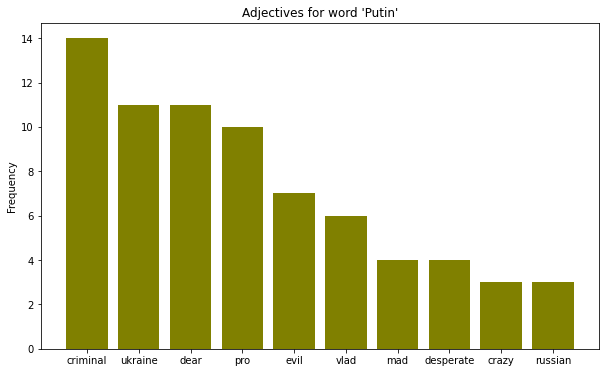

In [847]:
number = Counter(amod_list_p)

y = [count for tag, count in number.most_common(10)]
x = [tag for tag, count in number.most_common(10)]

plt.bar(x, y, color='olive')
plt.title("Adjectives for word 'Putin'")
plt.ylabel("Frequency")

plt.rcParams["figure.figsize"] = (10,6)

In [817]:
#Adjectives for word 'Zelensky'
name='zelensky'
amod_list_l=[]

for doc in tw_df.tweets:
    for token in doc:
        if token.text==name:
            for child in token.children:
                if child.dep_=='amod':
                    amod_list_l.append(child.text.lower())
                    
            

In [818]:
counts = Counter(amod_list_l)
print(counts)

Counter({'volodymyr': 10, 'ukraine': 9, 'brave': 3, 'incredible': 2, '⚡': 2, 'urgent': 2, 'alive': 1, 'controlled': 1, 'praised': 1, 'real': 1, 'weak': 1, 'former': 1, 'free': 1, 'ukrainian': 1, 'first': 1, 'zionist': 1, 'nuclear': 1, 'other': 1, 'wide': 1, 'kyiv': 1})


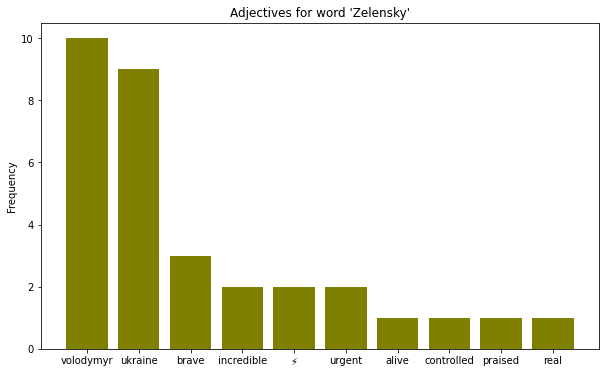

In [837]:
number = Counter(amod_list_l)

y = [count for tag, count in number.most_common(10)]
x = [tag for tag, count in number.most_common(10)]

plt.bar(x, y, color='olive')
plt.title("Adjectives for word 'Zelensky'")
plt.ylabel("Frequency")

plt.rcParams["figure.figsize"] = (10,6)

In [819]:
#### Adjectives for word 'Ukraine'
name='ukraine'
amod_list_u=[]

for doc in tw_df.tweets:
    for token in doc:
        if token.text==name:
            for child in token.children:
                if child.dep_=='amod':
                    amod_list_u.append(child.text.lower())

In [820]:
counts = Counter(amod_list_u)
print(counts)

Counter({'southern': 20, 'free': 19, 'strong': 19, 'western': 15, 'former': 14, 'kyiv': 12, 'eastern': 12, 'democratic': 10, 'ukraine': 8, 'northeastern': 7, ' ': 7, 'dear': 5, 'heroic': 5, 'independent': 5, 'whole': 5, 'south': 4, 'same': 4, 'live': 4, 'poor': 4, 'peaceful': 4, 'southeast': 4, 'tight': 3, 'central': 3, 'russian': 3, 'northern': 3, 'ridden': 3, 'beautiful': 2, 'neutral': 2, 'weak': 2, 'dead': 2, 'grand': 2, 'sovereign': 2, 'west': 2, 'supporting': 2, 'northwestern': 2, 'willing': 2, 'dnipro': 2, 'socialist': 2, 'se': 2, 'nuclear': 1, 'assailed': 1, 'supposed': 1, 'tested': 1, 'jewish': 1, 'torn': 1, '\xa0  ': 1, 'safe': 1, 'odessa': 1, 'entire': 1, 'aged': 1, 'dependent': 1, 'giant': 1, 'civilized': 1, 'european': 1, 'pro': 1, 'outside': 1, 'southwest': 1, 'selfish': 1, 'happy': 1, 'bloodshed': 1, 'real': 1, 'obvious': 1, 'concerned': 1, 'gomel': 1, 'alive': 1, 'defiant': 1, 'many': 1, 'mig': 1, 'manufacturing': 1, 'dent': 1, 'courageous': 1, 'lutsk': 1, 'little': 1, '

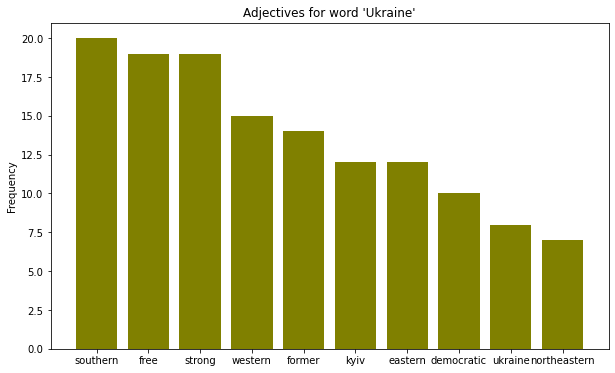

In [836]:
number = Counter(amod_list_u)

y = [count for tag, count in number.most_common(10)]
x = [tag for tag, count in number.most_common(10)]

plt.bar(x, y, color='olive')
plt.title("Adjectives for word 'Ukraine'")
plt.ylabel("Frequency")

plt.rcParams["figure.figsize"] = (10,6)

In [853]:
#### Adjectives for word 'Ukraine'
name='war'
amod_list_m=[]

for doc in tw_df.tweets:
    for token in doc:
        if token.text==name:
            for child in token.children:
                if child.dep_=='amod':
                    amod_list_m.append(child.text.lower())

In [875]:

counts = Counter(amod_list_m)
print(counts)

Counter({'ukraine': 277, 'nuclear': 143, 'cold': 80, 'russian': 41, 'ongoing': 26, 'civil': 25, 'ukrainian': 20, 'more': 20, 'anti': 18, 'real': 16, 'new': 16, 'illegal': 16, 'last': 15, 'senseless': 15, 'cyber': 13, 'global': 13, 'third': 13, ' ': 13, 'first': 12, 'second': 12, 'terrible': 11, 'criminal': 11, 'current': 10, 'next': 9, 'bloody': 9, 'long': 9, 'unprovoked': 9, '3rd': 9, 'unjust': 9, 'brutal': 8, 'whole': 8, 'unnecessary': 8, 'own': 8, 'proxy': 8, 'genocidal': 7, 'conventional': 7, 'only': 7, 'stupid': 6, 'full': 6, 'horrible': 6, 'good': 6, 'major': 6, 'out': 5, 'imperialist': 5, 'meaningless': 5, 'great': 5, 'russo': 5, 'international': 5, 'fucking': 5, 'aggressive': 4, 'syrian': 4, 'hot': 4, 'unjustified': 4, 'needless': 4, 'total': 4, 'actual': 4, 'massive': 4, 'crazy': 3, 'cruel': 3, 'possible': 3, 'front': 3, 'biological': 3, 'biggest': 3, 'spanish': 3, 'bad': 3, 'mad': 3, 'wrong': 3, 'devastating': 3, 'other': 3, 'pro': 3, 'ukrain': 3, 'insane': 3, 'european': 3, 

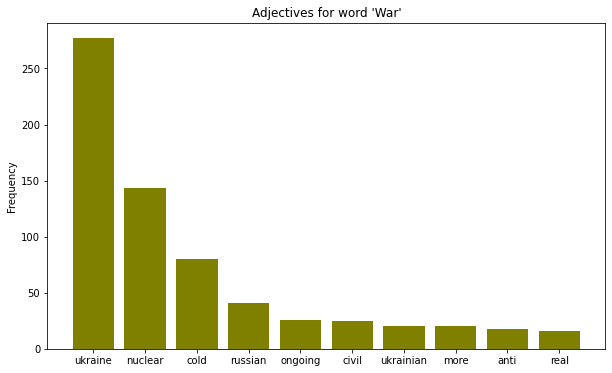

In [874]:
number = Counter(amod_list_m)

y = [count for tag, count in number.most_common(10)]
x = [tag for tag, count in number.most_common(10)]

plt.bar(x, y, color='olive')
plt.title("Adjectives for word 'War'")
plt.ylabel("Frequency")

plt.rcParams["figure.figsize"] = (10,6)

# Word2Vec

In [377]:
from sklearn.manifold import TSNE

In [371]:
from gensim.models import Word2Vec

In [430]:
docs_lemmatize


[['  ',
  'capture',
  'russian',
  'soldier',
  '  ',
  'they',
  'say',
  'what',
  'their',
  'own',
  'battalion',
  ' ',
  'where',
  'they',
  'be',
  'from',
  'and',
  'then',
  'tell',
  'he',
  'it',
  'be',
  'just',
  'train',
  'and',
  'do',
  'not',
  'know',
  'they',
  'be',
  'in',
  'ukraine',
  '             '],
 ['like',
  'everybody',
  'else',
  'I',
  'be',
  'root',
  'for',
  'ukraine',
  'to',
  'fight',
  'off',
  'russia',
  ' ',
  'but',
  'see',
  'this',
  'video',
  'be',
  'truly',
  'sad',
  ' ',
  'these',
  'soldier',
  'be',
  'clueless',
  'and',
  'lose',
  'and',
  'be',
  'force',
  'to',
  'fight',
  'for',
  'a',
  'corrupted',
  'dictator',
  'that',
  'be',
  'vladimir',
  'putin',
  ' ',
  'they',
  'do',
  'n’t',
  'want',
  'this',
  '       '],
 ['we',
  'elect',
  'a',
  'game',
  'show',
  'host',
  'and',
  'get',
  'a',
  'clown',
  '   ',
  'elect',
  'a',
  'comedian',
  'and',
  'get',
  'a',
  'hero',
  '  ',
  'source',
  ' ',


In [437]:
model = Word2Vec(docs_lemmatize, vector_size=10, window=20, min_count=20, workers=4)
model.wv['ukraine']

array([-0.22368398,  2.0277438 , -0.02232093,  0.11378839,  1.7222818 ,
       -1.1188984 ,  0.5712712 ,  1.0584093 ,  0.42544693, -1.2911289 ],
      dtype=float32)

In [497]:
model.wv.most_similar('putin')

[('puppet', 0.9181651473045349),
 ('threaten', 0.8797967433929443),
 ('hitler', 0.8618333339691162),
 ('coward', 0.8510791063308716),
 ('weak', 0.838253915309906),
 ('warmonger', 0.8302947282791138),
 ('dictator', 0.8267050981521606),
 ('madman', 0.8253138661384583),
 ('put', 0.8200377225875854),
 ('mad', 0.8180135488510132)]

In [478]:
model.wv.most_similar('zelensky')

[('zelenskyy', 0.9416937232017517),
 ('volodymyr', 0.9349132776260376),
 ('president', 0.924403965473175),
 ('zelenskiy', 0.8791467547416687),
 ('his', 0.8758799433708191),
 ('democratically', 0.8147981762886047),
 ('meet', 0.8068607449531555),
 ('praise', 0.7997029423713684),
 ('himself', 0.7886671423912048),
 ('extort', 0.7689980268478394)]

In [498]:
model.wv.most_similar('russia')

[('expansion', 0.9201341271400452),
 ('sanction', 0.9124718904495239),
 ('isolate', 0.9036275744438171),
 ('pressure', 0.8824303150177002),
 ('impose', 0.8791989684104919),
 ('tie', 0.8717527389526367),
 ('escalate', 0.8647485971450806),
 ('provoke', 0.8612870573997498),
 ('deal', 0.8596240878105164),
 ('removal', 0.852574348449707)]

In [883]:
model.wv.most_similar('poland')

[('refugee', 0.9619964361190796),
 ('cross', 0.9604359269142151),
 ('passport', 0.9576801061630249),
 ('passage', 0.9311464428901672),
 ('rescue', 0.930264413356781),
 ('polish', 0.9235228300094604),
 ('bus', 0.9206966757774353),
 ('travel', 0.918583869934082),
 ('romania', 0.9185347557067871),
 ('entry', 0.9030534625053406)]

In [561]:
#This code was taken from the link below; I tried to make changes in it to tailor it 
#for .most_similar words but didn't figure out how to do it. It worked only when I used the whole corpus.

#https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

def reduce_dimensions(model):
    num_dimensions = 3  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels
x_vals, y_vals, labels = reduce_dimensions(model)

#def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    #from plotly.offline import init_notebook_mode, iplot, plot
    #import plotly.graph_objs as go

    #trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    #data = [trace]

    #if plot_in_notebook:
        #init_notebook_mode(connected=True)
        #iplot(data, filename='word-embedding-plot')
    #else:
        #plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [682]:
from wordcloud import WordCloud

In [761]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(random_state=1, 
                      background_color='white', colormap='tab20b', max_words = 100, 
                      collocations=False, normalize_plurals=False).generate(string_tw)

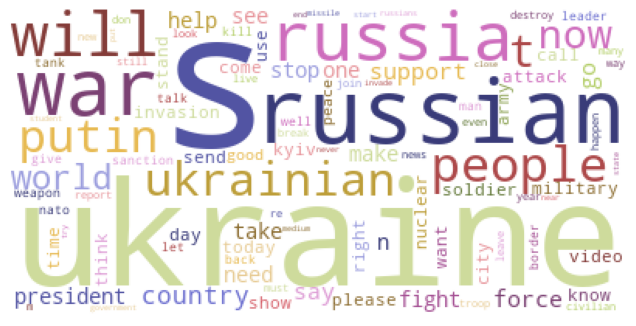

In [763]:
import matplotlib.pyplot as plt   
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(10, 8), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   

plot_cloud(wordcloud)